# Model Development

<h4>Setup</h4>


Import libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

load data and store in dataframe df:


In [3]:
# path of data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h3>1. Linear Regression and Multiple Linear Regression</h3>


<h4>Linear Regression</h4>


<h4>Lets load the modules for linear regression</h4>


In [4]:
from sklearn.linear_model import LinearRegression

<h4>Create the linear regression object</h4>


In [5]:
lm = LinearRegression()
lm

LinearRegression()

<h4>How could Highway-mpg help us predict car price?</h4>


In [6]:
X = df[['highway-mpg']]
Y = df['price']

Fit the linear model using highway-mpg.


In [7]:
lm.fit(X,Y)

LinearRegression()

We can output a prediction


In [8]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

<h4>What is the value of the intercept (a)?</h4>


In [9]:
lm.intercept_

38423.3058581574

<h4>What is the value of the Slope (b)?</h4>


In [10]:
lm.coef_

array([-821.73337832])

<h3>What is the final estimated linear model we get?</h3>


Plugging in the actual values we get:


<b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg</b>


In [11]:
# Create a linear regression object?
lm1 = LinearRegression()
lm1

LinearRegression()

In [25]:
# Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable?
X = df[['engine-size']]
Y = df['price']

lm1.fit(X,Y)
lm1

LinearRegression()

<h4>Slope</h4>


In [27]:
# Find the slope and intercept of the model?
lm1.intercept_

-7963.338906281042

<h4>Intercept</h4>


In [29]:
# Write your code below and press Shift+Enter to execute 
lm1.coef_

array([166.86001569])

#### Price = -7963.338906281042 + 166.86001569 * engine-size

<h4>Multiple Linear Regression</h4>


<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.


In [35]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Fit the linear model using the four above-mentioned variables.


In [36]:
lm.fit(Z, df['price'])

LinearRegression()

What is the value of the intercept(a)?


In [37]:
lm.intercept_

-15806.62462632922

What are the values of the coefficients (b1, b2, b3, b4)?


In [38]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

What is the final estimated linear model that we get?


<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


In [39]:
# Create and train a Multiple Linear Regression model "lm2" where the response variable is price, and the predictor variable is 'normalized-losses' and  'highway-mpg'.
lm2 = LinearRegression()
Var = df[['normalized-losses', 'highway-mpg']]
lm2.fit(Var, df['price'])

LinearRegression()

In [42]:
# Find the coefficient of the model
lm2.coef_

array([   1.49789586, -820.45434016])

<h3>2)  Model Evaluation using Visualization</h3>


import the visualization package: seaborn


In [43]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

<h3>Regression Plot</h3>


Let's visualize **highway-mpg** as potential predictor variable of price:


(0.0, 48144.82557790799)

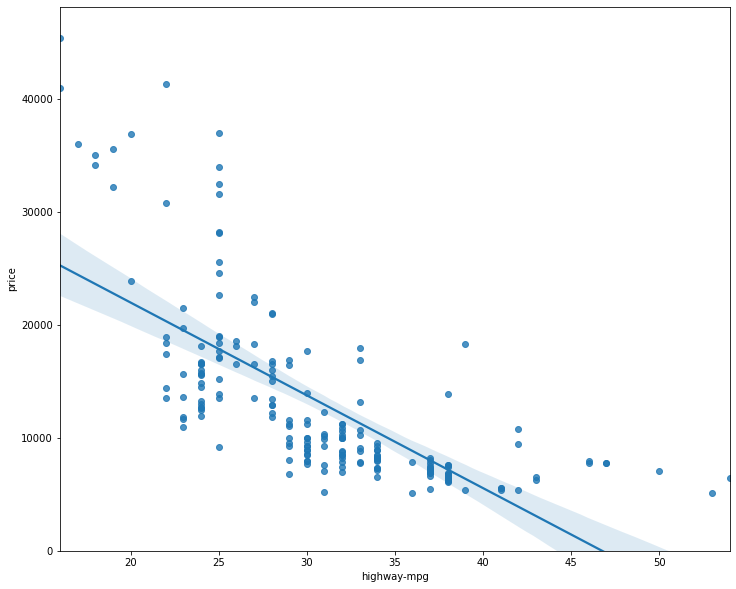

In [44]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

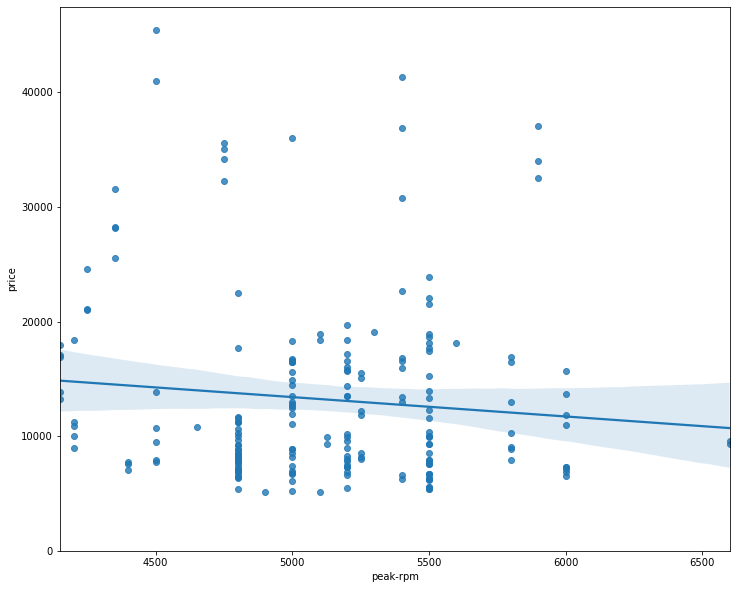

In [45]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [48]:
# Given the regression plots above is "peak-rpm" or "highway-mpg" more strongly correlated with "price". Use the method  ".corr()" to verify your answer.
df[['peak-rpm', 'highway-mpg', 'price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<h3>Residual Plot</h3>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


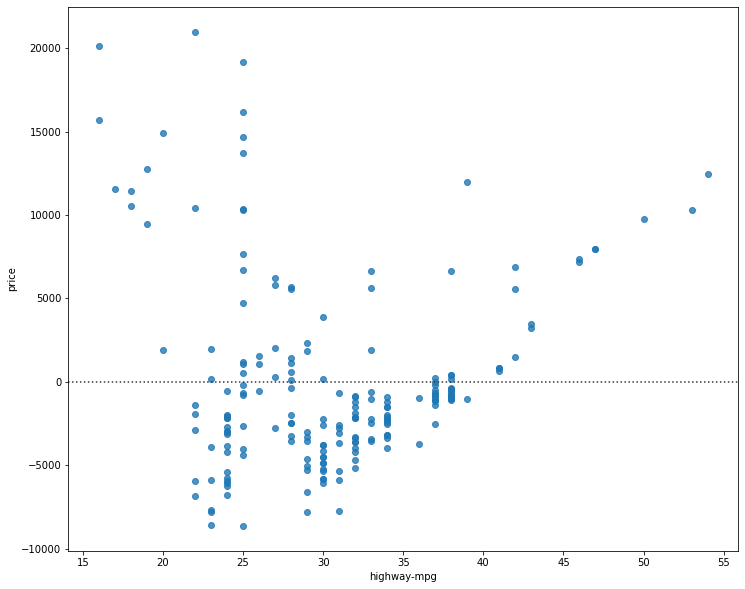

In [49]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

<h3>Multiple Linear Regression</h3>


First lets make a prediction


In [50]:
Y_hat = lm.predict(Z)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


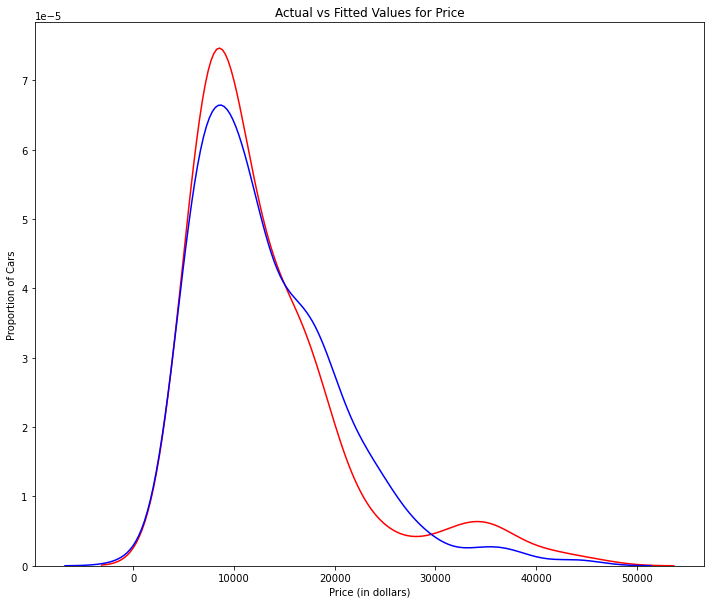

In [52]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>


<h2>Part 3: Polynomial Regression and Pipelines</h2>


<p>We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>


<p>We will use the following function to plot the data:</p>


In [53]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Lets get the variables


In [54]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.


In [55]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Let's plot the function


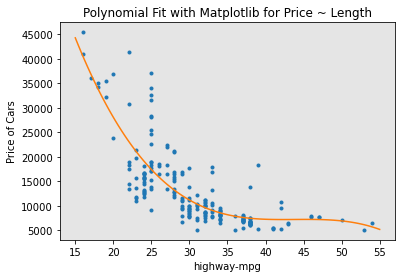

In [56]:
PlotPolly(p, x, y, 'highway-mpg')

In [57]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<p>We can already see from plotting that this polynomial model performs better than the linear model.</p>


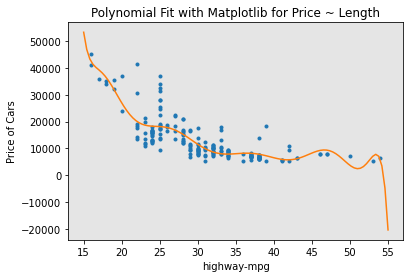

In [58]:
# Create 11 order polynomial model with the variables x and y from above?
g = np.polyfit(x, y, 11)
q = np.poly1d(g)
PlotPolly(q, x, y, 'highway-mpg')

We can perform a polynomial transform on multiple features. First, we import the module:


In [59]:
from sklearn.preprocessing import PolynomialFeatures

We create a <b>PolynomialFeatures</b> object of degree 2:


In [60]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [61]:
Z_pr=pr.fit_transform(Z)

The original data is of 201 samples and 4 features


In [62]:
Z.shape

(201, 4)

after the transformation, there 201 samples and 15 features


In [63]:
Z_pr.shape

(201, 15)

<h2>Pipeline</h2>


In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


In [65]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

we input the list as an argument to the pipeline constructor


In [66]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

We can normalize the data,  perform a transform and fit the model simultaneously.


In [67]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously


In [68]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])


<b>Create a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features Z and targets y</b>


In [70]:
# Write your code below and press Shift+Enter to execute 
Input1 = [('scale', StandardScaler()), ('model', LinearRegression())]
pipe1 = Pipeline(Input1)
pipe1.fit(Z,y)
ypipe1=pipe1.predict(Z)
ypipe1[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

<h2>Part 4: Measures for In-Sample Evaluation</h2>


<h3>Model 1: Simple Linear Regression</h3>


Let's calculate the R^2


In [71]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".


Let's calculate the MSE


We can predict the output i.e., "yhat" using the predict method, where X is the input variable:


In [72]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


lets import the function <b>mean_squared_error</b> from the module <b>metrics</b>


In [73]:
from sklearn.metrics import mean_squared_error

we compare the predicted results with the actual results


In [74]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.025174143


<h3>Model 2: Multiple Linear Regression</h3>


Let's calculate the R^2


In [75]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".


Let's calculate the MSE


we produce a prediction


In [76]:
Y_predict_multifit = lm.predict(Z)

we compare the predicted results with the actual results


In [77]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h3>Model 3: Polynomial Fit</h3>


Let's calculate the R^2


let’s import the function <b>r2\_score</b> from the module <b>metrics</b> as we are using a different function


In [78]:
from sklearn.metrics import r2_score

We apply the function to get the value of r^2


In [79]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit


<h3>MSE</h3>


We can also calculate the MSE:


In [80]:
mean_squared_error(df['price'], p(x))

20474146.426361207

<h2>Part 5: Prediction and Decision Making</h2>

In [81]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Create a new input


In [82]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

Fit the model


In [83]:
lm.fit(X, Y)
lm

LinearRegression()

Produce a prediction

In [84]:
yhat=lm.predict(new_input)
yhat[0:5]

array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

we can plot the data


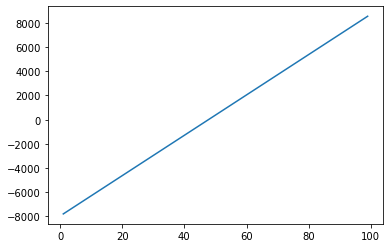

In [85]:
plt.plot(new_input, yhat)
plt.show()

<h3>Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)</h3>


This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.


<h3>Simple Linear Model (SLR) vs Polynomial Fit</h3>



<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.</p>


<h3>Multiple Linear Regression (MLR) vs Polynomial Fit</h3>


<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.</p>
